## Assignment 1.1 Tree Search

### 📌 Important Information
- **Deadline**: October 11, 2024, by 23:59 (`Beijing Time`)
- **Submission File**: 
    - Assignment 1.2 will be released next week. `You are required to submit both 1.1 (Tree Search) and 1.2 together`. 
- **Submission Format**: 
    - Export your Jupyter Notebook (.ipynb file) with your answer as a **PDF**
    - Submit both the **PDF** and the **source code (.ipynb)** via sustech blackboard system.
    - **The detailed requirement would be released in the next time.**

### ℹ️ Introduction
In this assignment, you will implement three fundamental search algorithms:
- Depth-First Tree Search
- Breadth-First Tree Search
- Uniform Cost Tree Search

These algorithms are commonly used in artificial intelligence tasks like pathfinding, and graph traversal. Your implementation will be applied to a **grid-based maze**, where each cell in the grid can represent either a blocked cell, or a weighted cost. Your task is to `find a path from a given start point to a goal point using different search methods`. 

### ❓Maze Setup
The maze is represented as a 2D grid (list of lists). Each cell in the grid contains a number that determines its type:
  - **-1**: Blocked space (you cannot move through this cell).
  - Any **positive number greater than 0**: A weighted space, where the number represents the cost to move into this cell (e.g., `2` means it costs 2 units to move here).
  - **Objective**: Generally, we take the top-left corner (0,0) as the `start` and find a path to the bottom-right corner with the lowest total cost.
  
Movement is allowed in **four directions**: up, down, left, and right (no diagonal movement).

### ⭐ Hint

#### Expected Input:
- `start` (tuple): The starting coordinates (row, col).
- `goal` (tuple): The goal coordinates (row, col).

#### Expected Output:
- A list of tuples representing the path from the start to the goal, or `None` if no path is found. 
For example: `[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]`

#### Tie breaking rule:
Break the tie based on the value of x, prioritizing nodes with smaller x values. If multiple nodes have the same x value, break the tie by selecting nodes with smaller y values first.


------------------------------------------------------------------------

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from queue import PriorityQueue, deque
import heapq
class PathFinder:
    def __init__(self, grid):
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])
        
    ans = []
    found = False

    def depthFirstSearch(self, start, goal):
        if start not in self.ans:
            self.ans.append(start)
        if start == goal:
            return self.ans
        directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        for i in range(4):
            new_row = start[0] + directions[i][0]
            new_col = start[1] + directions[i][1]

        for i in range(4):
            new_row = start[0] + directions[i][0]
            new_col = start[1] + directions[i][1]
            if 0 <= new_row < self.rows and 0 <= new_col < self.cols and (
                    new_row, new_col) not in self.ans and self.found == False and self.grid[new_row][new_col] != -1:

                # print(self.grid[new_row][new_col])
                self.ans.append((new_row, new_col))
                # print(self.ans)
                result = self.depthFirstSearch((new_row, new_col), goal)  # 递归调用
                if result:  # 如果找到了路径
                    return result  # 返回找到的路径
                else:  # 如果没有找到路径，撤销选择
                    # 如果没有找到，撤销选择
                    self.ans.pop()
        # return None

    def breadthFirstSearch(self, start, goal):
        queue = deque([start])

        # 用于记录已经访问过的节点
        self.visited = set()
        self.visited.add(start)

        # 用于记录路径
        self.ans = []  # 清空路径
        parent_map = {start: None}

        while queue:
            current = queue.popleft()
            if current == goal:
                while current is not None:
                    self.ans.append(current)
                    current = parent_map[current]
                self.ans.reverse()
                return self.ans

            directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]

            for direction in directions:
                new_row = current[0] + direction[0]
                new_col = current[1] + direction[1]
                new_position = (new_row, new_col)

                if (0 <= new_row < self.rows and
                        0 <= new_col < self.cols and
                        new_position not in self.visited and
                        self.grid[new_row][new_col] != -1):
                    queue.append(new_position)
                    self.visited.add(new_position)
                    # print(self.visited)
                    parent_map[new_position] = current
                    # print(parent_map)

        return None

    def uniformCostSearch(self, start, goal):
        # 优先级队列，存储待扩展的节点及其到起始节点的累计成本
        queue = []
        heapq.heappush(queue, (0, start))  # 初始成本为0，起始节点入队

        # 用于记录每个节点的访问状态和到达该节点的成本
        self.visited = set()
        costs = {start: 0}  # 记录每个节点的最小成本
        parent_map = {start: None}  # 记录路径所需的父节点信息

        while queue:
            current_cost, current = heapq.heappop(queue)  # 取得最小成本的节点

            # 检查当前节点是否为目标节点
            if current == goal:
                path = []  # 初始化路径
                while current is not None:  # 通过parent_map构建路径
                    path.append(current)
                    current = parent_map[current]
                path.reverse()  # 反转路径以便从起点到终点
                return path  # 返回从起点到终点的路径

            # 标记当前节点为已访问
            self.visited.add(current)

            # 获取当前节点的邻居位置
            directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]

            for direction in directions:
                new_row = current[0] + direction[0]
                new_col = current[1] + direction[1]
                new_position = (new_row, new_col)

                # 检查新位置是否合法
                if (0 <= new_row < self.rows and
                        0 <= new_col < self.cols and
                        new_position not in self.visited and
                        self.grid[new_row][new_col] != -1):  # 确保不是障碍物

                    # 计算到达新位置的总代价
                    new_cost = current_cost + self.grid[new_row][new_col]

                    # 如果新位置未被访问过，或找到更低成本，则更新
                    if new_position not in costs or new_cost < costs[new_position]:
                        costs[new_position] = new_cost  # 更新成本
                        parent_map[new_position] = current  # 设置父节点
                        heapq.heappush(queue, (new_cost, new_position))  # 入队

        return None  # 如果没有找到目标，返回None

                        
    
    def visualize_path(self, path):
        grid = np.array(self.grid) 
    
        plt.figure(figsize=(10, 10))
        plt.imshow(grid, cmap="Greys", origin="upper") 
    
        if path is not None: 
            if path is not None:
                path_x = []
                path_y = []
    
                for point in path:
                    path_x.append(point[0]) 
                    path_y.append(point[1])
                    
            plt.plot(path_y, path_x, marker='o', color='red', linewidth=2, markersize=6, label='Path')  
    
        plt.text(path[0][1], path[0][0], 'Start', color='green', fontsize=12, ha='center', va='center')
        plt.text(path[-1][1], path[-1][0], 'Goal', color='blue', fontsize=12, ha='center', va='center')
    
        plt.legend()
        plt.xticks(np.arange(grid.shape[1])) 
        plt.yticks(np.arange(grid.shape[0])) 
        plt.grid(True) 
        plt.title("Path Visualization")
    
        plt.show()


## Test
You can use code below to test your implementation.

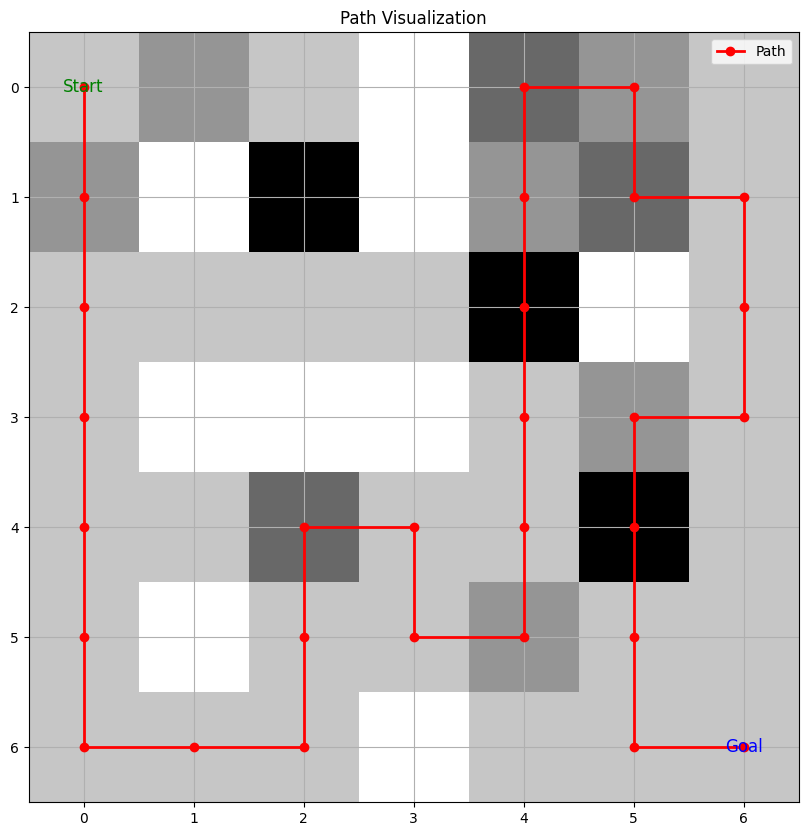

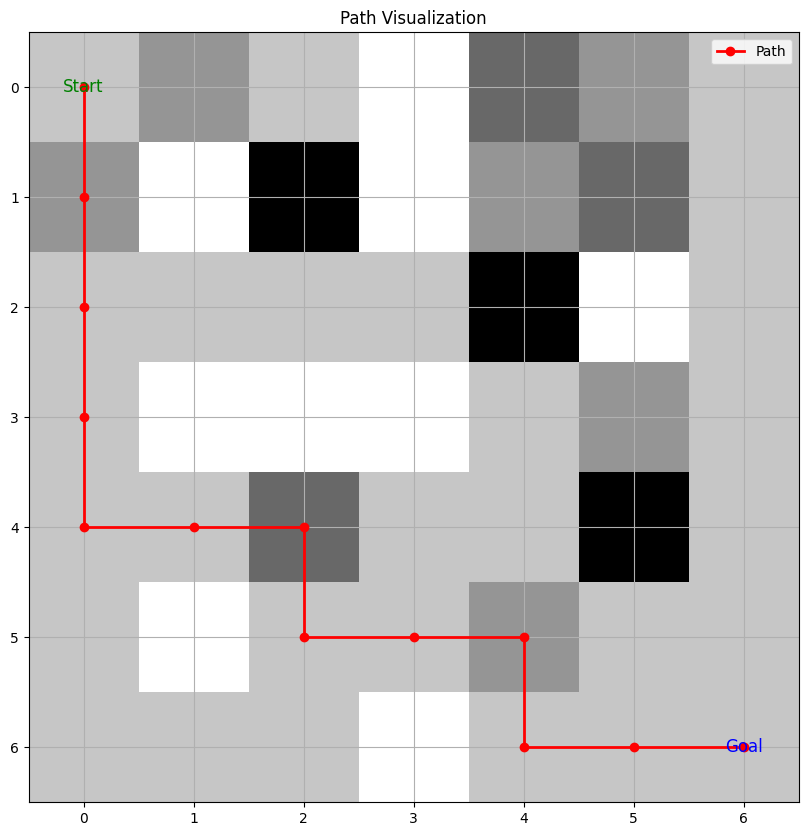

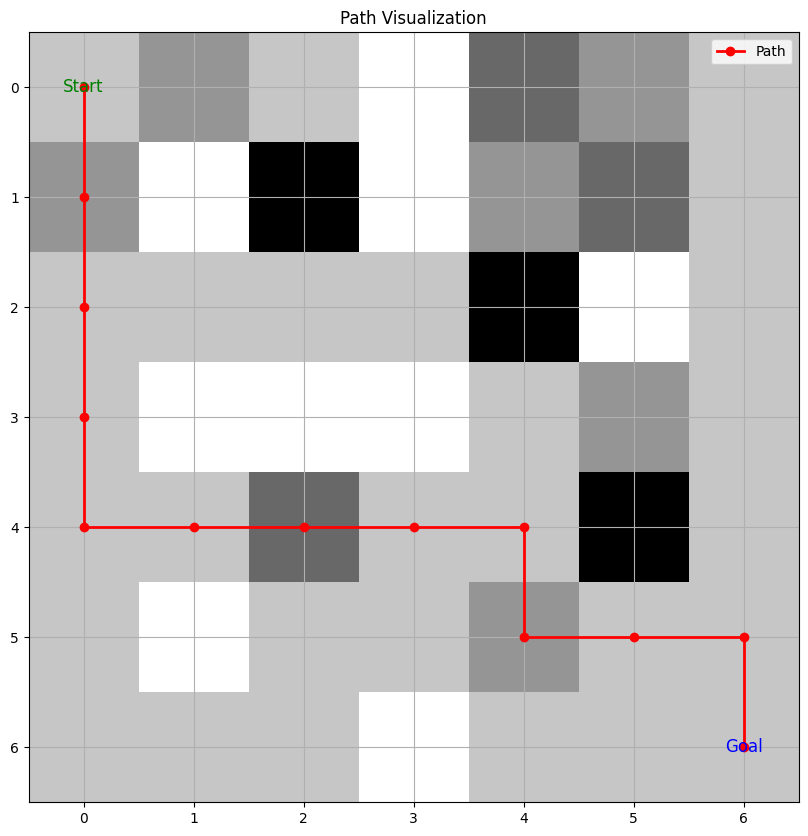

In [23]:

grid = [
    [1, 2, 1, -1, 3, 2, 1],
    [2, -1, 5, -1, 2, 3, 1],
    [1, 1, 1, 1, 5, -1, 1],
    [1, -1, -1, -1, 1, 2, 1],
    [1, 1, 3, 1, 1, 5, 1],
    [1, -1, 1, 1, 2, 1, 1],
    [1, 1, 1, -1, 1, 1, 1]
]

# build class
pathfinder = PathFinder(grid)

# start and goal
start=(0, 0)
goal=(6, 6)

# find path
dfs_path = pathfinder.depthFirstSearch(start, goal)
bfs_path = pathfinder.breadthFirstSearch(start,goal)
ucs_path = pathfinder.uniformCostSearch(start, goal)

# visualization
pathfinder.visualize_path(dfs_path)
pathfinder.visualize_path(bfs_path)
pathfinder.visualize_path(ucs_path)
    
